# Othello game using Reinforcement Learning & Negamax

*By* 

*Avinash Konduru (avinash.konduru@colostate.edu)*

*& Nikhila Chireddy (cnreddy@colostate.edu)*

# Table of Contents
* [Introduction](#Introduction)
* [Othello](#Othello)
* [Methods](#Methods)
* [Code](#Code)
* [Results](#Results)
* [Roles](#Roles)
* [Conclusion](#Conclusion)
* [References](#References)

## <font color='blue'>Introduction</font>

In video games, **artificial intelligence** is used to generate responsive or intelligent behaviors primarily in non-player characters (NPCs), similar to human-like intelligence. These NPCs are generally referred as **bots**. A bot is a type of AI expert system software that plays a video game in place of a human. 

Implementing a game as term project would be more fun when compared to building a model for classification. We would be spending hours playing our own game in the name of testing as well understand competency of AI, rather than spending hours analysing the given data to fit the a right model that can classify the data.

**Othello** $^{[1]}$ is an abstract strategy game. Someone once said *Othello - 'A minute to learn... A life time to master'*. And we ended up playing it number of times (available online) just to understand how the existing AI works and see if we can beat it.

In our project we have used the Negamax search algorithm along with Reinforcement Learning to train and play **Othello** . 

From our research, we felt that if the AI is trained using Reinforcement Learning, it would play faster and better and would also be more challenging for the player. Thus we started with Negamax AlphaBeta Pruning and then trained the AI using Reinforcement Learning. 

For each game played by the player, the AI learns from the moves and keeps updating the Q-table thus making the AI more intelligent. We have trained our AI for 500 games against the negamax AI and later tested it by playing about 100 games manually. The results section shows different plots of the number of games won by the AI and the number of steps for each game. 


## <font color='blue'>Othello</font>

Othello$^{[2]}$ is a strategy game played by two players: Black and White. It is played on an 8x8 board (usually Green in colour), called the Othello board. The two players place 64 discs, each of which is black on one side and white on the other.

##### Goal

The winner is the player who has more discs of his colour than his opponent at the end of the game. This will happen when neither of the two players has a legal move. Generally at this stage all 64 squares are occupied.

##### Starting Position

At the beginning of the game, two black discs are placed on e4 and d5 and two white discs on d4 and e5.

<img src = "http://www.iggamecenter.com/images/info/reversi/2.png" >

Black always begins, and the two players subsequently take turns moving.

##### Making a Move

At his turn, a player must place a disc of his colour on one of the empty squares of the othello board, adjacent to an opponent's disc. In addition, by placing his disc, he must flank one or several of his opponent's discs between the disc played and another disc of his own colour already on the board. He then flips to his colour all the discs which were flanked. The discs are neither removed from the Othello board nor moved from one square to another.

If the second player cannot make a move to flip at least one of the opponent's discs according to these rules, he must pass his turn and the opponent once again gets the turn to play. But if a move is possible, player cannot pass it.

##### End of the Game

The game is over when neither of the two players has a legal move or when the board is filled.

##### Deciding the Winner

The player who has maximum number of disks on the board wins the game.

## <font color='blue'>Methods</font>

Our game has two different modes of AI for the user to select - Negamax AI and RL QTable AI, which uses Negamax Alpha Beta Pruning and Reinforcement Learning respectively.

### Negamax

**NegaMax** is a variant form of the minimax search that relies on the zero-sum property of a two-player game. Each node and root node in the tree are game states (such as game board configuration) of a two player game. Transitions to child nodes represent moves available to a player who's about to play from a given node.
The negamax search objective is to find the node score value for the player who is playing at the root node. 

Alpha-beta pruning can decrease the number of nodes the negamax algorithm evaluates in a search tree. Alpha (α) and beta (β) represent lower and upper bounds for child nodes at a given tree depth. Negamax sets the arguments α and β for the root node to the lowest and highest values possible. When negamax encounters a child node outside an alpha/beta range, the negamax search cuts off, thereby pruning portions of the game tree from exploration. Cut offs are implicit based on the node return value, bestValue. A node value found within the range of its initial α and β is the node's exact (or true) value. This value is identical to the result the negamax base algorithm would return, without cut offs and without any α and β bounds. If a node return value is out of range, then the value represents an upper (if value ≤ α) or lower (if value ≥ β) bound for the node's exact value. Alpha-beta pruning eventually discards any value bound results. Such values do not contribute nor affect the negamax value at its root node$^{[3]}$.

### Reinforcement Learning

**Reinforcement learning (RL)** is an area of machine learning inspired by behaviourist psychology, concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward$^{[4]}$. 

The core of most reinforcement learning approaches is learning a Q function that tell us utility of each state in the game. We can easily decide which action to take by choosing the action that lead to a state with higher utility (or fitness).

For our game, we have generated the Q-Table for 500 games, where the opponent used Negamax algorithm to make a move. The results section shows the statistics of number of games won by the AI against the Negamax AI and also the number of steps for each game.

After training the AI, we manually tested it by playing games. For each game played, we update the Q-table for each move. Thus we increase the learning of the AI.

We have taken the lecture notes as reference for implementing the Negamax alpha beta pruning and Reinforcement Learning algorithms.


## <font color='blue'>Code</font>

To create the user interface, we have used the Pygame python library. It is supported only in python version 2.7. To ensure compatibility, we have implemented the other classes also in the same version. 

**Pygame**$^{[5]}$ is a cross-platform set of Python modules designed for writing video games. It includes computer graphics and sound libraries designed to be used with the Python programming language. 

We have used an existing version of Othello GUI written by - Humberto Henrique Campos Pinheiro$^{[6]}$ and modified it accordingly based on our needs.


We have written 5 classes for our project.

1. OthelloBoard - This class initializes the Othello board and has the methods to get the valid moves, perform a move operation, get the winner, etc.
2. Gui - This class implementes the GUI for the Othello board. It is updated for each move.
3. NegaMax - This class has the Negamax alpha beta pruning algorithm implementation.
4. QTable - This class applies reinforcement learning on the board and generates the Q-Table
5. Othello - This class initializes the game with Black as human and White as the AI. Based on our selection of AI agent in the initial screen, it invokes either the Negamax or Reinforcement Learning Algorithm. The game class interacts with the GUI and controls all the other operations.

The code below shows the implementation of the Othello class.

**Note**: Please ensure to extract the tar file submitted along with this notebook in order to execute the below code correctly

In [9]:
#'''

#The following is code borrowed from https://github.com/humbhenri/pyOthello/blob/master/othello.pyw 

#Original code is written by - Humberto Henrique Campos Pinheiro

#We have modified a little bit to meet our project requirements

#Avinash Konduru, Nikhila Chireddy

#'''

import pygame
from OthelloUI import Gui
from Players import NegamaxAI, Human
from Board import OthelloBoard
from Constants import BLACK, WHITE,EASY,HARD
from RL import QtableAI
import win32api

#py2exe workaround
import sys
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')


class Othello:

    ##"""
    #Game main class.
    #"""

    def __init__(self):
        """ Show options screen and start game modules"""
        # start
        self.gui = Gui()
        self.board = OthelloBoard()
        self.get_options()        

    def get_options(self):
        # set up players
        player1, player2, mode = self.gui.show_options()
        
        #player1 will always be HUMAN, thus assigning to HUMAN
        self.now_playing = Human(self.gui, BLACK)
        
        if mode == HARD:
            self.other_player = QtableAI(WHITE)
            
            #Load the Qtable from file
            isSuccess = self.other_player.LoadTrainedAI()
            if isSuccess == False:
                self.other_player = NegamaxAI(WHITE, 5)
                
        if mode == EASY:
            self.other_player = NegamaxAI(WHITE, 5)

        self.gui.show_game()
        self.gui.update(self.board.board, 2, 2,self.now_playing.color)

    def run(self):
        
        #clock = pygame.time.Clock()
        while True:
            
            #clock.tick(60)
            isGameOver,winner = self.board.IsGameOver()
            
            if isGameOver == True:
                break
            
            #self.now_playing.get_current_board(self.board)
            moves = self.board.GetValidMoves(self.now_playing.color)
            if moves != []:
                
                score, self.board = self.now_playing.MakeMove(self.board)
                
                whites, blacks, empty = self.board.GetCounts()
                                
            self.now_playing, self.other_player = self.other_player, self.now_playing
            self.gui.update(self.board.board, blacks, whites,self.now_playing.color)
            if self.now_playing.color == WHITE:
                pygame.time.wait(1000)
        
        pygame.time.wait(3000)
        
        self.gui.show_winner(winner)
        
        self.restart()

    def restart(self):
        self.board = OthelloBoard()
        self.get_options()
        self.run()




In [10]:
def main():
    game = Othello()
    game.run()

#main()

The above command will open a pyGame Window, which allows us to select one of the two different modes available. Please refer to screen shot attached. Please ignore the exception below the `main()` function call, since the opened GUI runs on a seperate thread and kernel will be busy as long as we play the game. Once we close the game, Kernel will throw the above exception since it is interrupted.

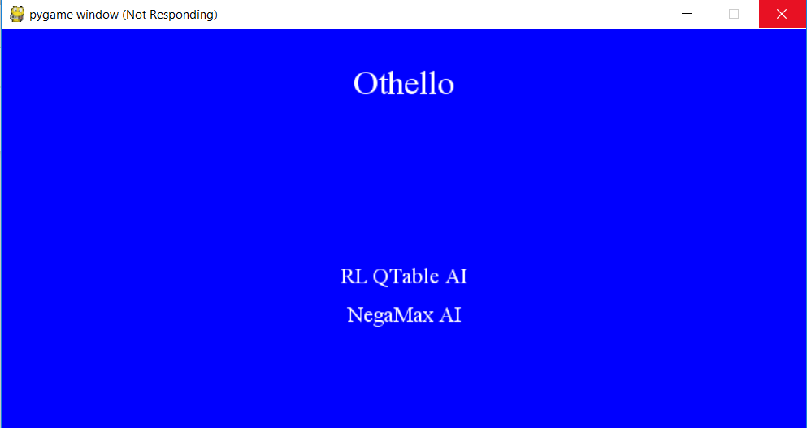

 
1. Negamax AI - The AI internally uses the negamax algorithm in this mode.
2. RL QTable AI - The AI uses Reinforcement Learning in this mode.

## <font color='blue'>Results</font>

#### Negamax Results:

In our approach, we have experimented Negamax Alpha Beta Pruning with different depth limits. The below table shows the average time taken by the AI for different depth values.


<table>
<th ><center>Depth</center></th>
<th ><center>Avg Time taken for a move</center></th>
<tr style = "text-align: left">
<td >3</td>
<td >1.23 seconds</td>
</tr>
<tr style = "text-align: left" >
<td>5</td>
<td>2.34 seconds</td>
</tr>
<tr style = "text-align: left">
<td>10</td>
<td>110 seconds</td>
</tr>
<tr style = "text-align: left">
<td>20</td>
<td>404 secons</td>
</tr>
</table>

From the above table, it is evident that as the depth increases, the time taken by the AI to make a move also increases. The depth values 3 and 5 are taking lesser time but then, negamax with depth 3 was not very successful in returning a move out of the available valid moves on any given state of the Othello Board. Depth 10 and 20 return moves which have higher win chances but take more time. 

Since we want the game to be interactive as well as challenging, we have considered the depth value as 5 which has a decent performance.


#### Reinforcement Learning Results:

We have trained the AI for 500 games, where the opponent is also an AI which uses the Negamax algorithm with depth 3 to make a move. Below are the different plots that show the statistics of number of games won by the AI against the Negamax AI and also the number of steps for each game.

In [11]:
import glob
import numpy as np
import ntpath
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def Plot(filePath,numIterations):

    files = glob.glob(filePath)
    plt.figure(figsize=(20,20))
    c=1
    X = np.asarray(list(range(numIterations)))
    for file in files:
        Y = np.loadtxt(file, dtype=float)    
        plt.subplot(3,3, c)
        filename = ntpath.basename(file)    
        plt.scatter(X,Y,alpha='0.5',label=filename.split('.')[0])
        plt.xlabel(ntpath.basename(file))
        plt.legend()
        c=c+1

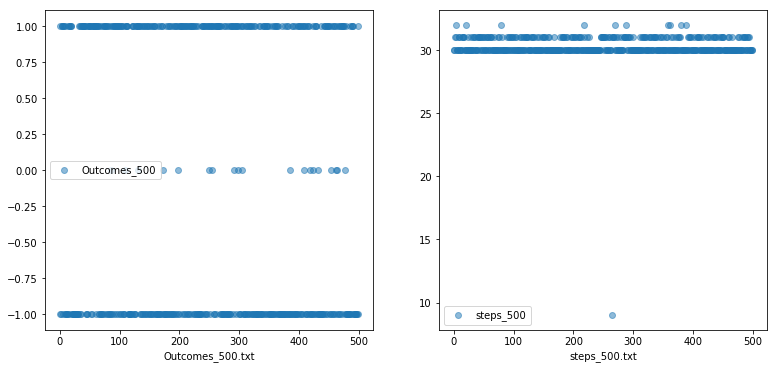

In [13]:
Plot('./*_500.txt',500)

As we can see from the plots, the number of games won by the Reinforcement AI is almost equal to the number of games it lost.
There are also some games where the result was a tie which indicates that both the AI bots were competent enough to stop the other from winning. Also, the number of steps is always above 30 which also indicates the same.

With the Negamax AI of depth 3, the results were obtained very fast for 500 games(~15mins).

After training the AI, we manually tested it by playing games. For each game played, we update the Q-table for each move. Thus we increase the learning of the AI.


We have re-trained the AI for 100games by increasing the competency of Negamax AI (with depth limit 5). This took almost 5 hours for execution. The results are as follows:

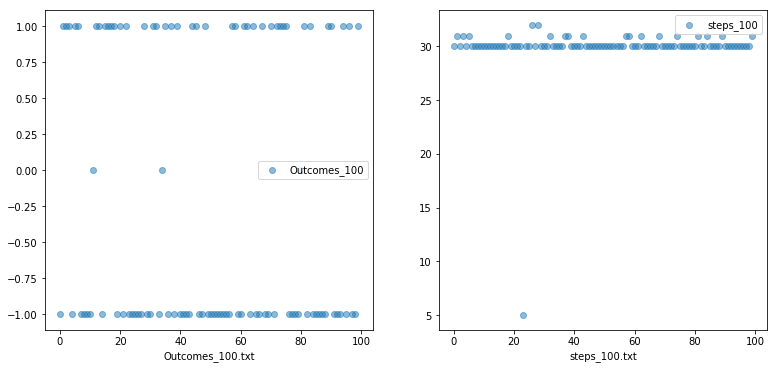

In [14]:
Plot('./*_100.txt',100)

From the plots, we can see that the results are almost similar to the training that we have done earlier with Negamax of depth-3. However, in this case the number of wins of Negamax seems to be slightly more than the Reinforcement Learning AI.

After all the training process, the final size of the Q-table after writing into the file is ~9MB.


## <font color='blue'>Roles</font>

<table>
<th></th>
<th ><center>Avinash</center></th>
<th ><center>Nikhila</center></th>
<tr style = "text-align: left">
<td >Week1</td>
<td >Worked on GUI</td>
<td>Implemented the Board class</td>
</tr>
<tr style = "text-align: left" >
<td>Week2</td>
<td>Implemented NegaMax Alpha Beta Pruning</td>
<td>Implemented Game Class</td>
</tr>
<tr style = "text-align: left">
<td>Week3</td>
<td>Updating the Q-Table, Writing the Q-table to a file and reading from it.
    Integrating the code with the existing Negamax implementation</td>
<td>Implemented the Reinforcement Learning Algorithm to train the Q-Table</td>
</tr>
<tr style = "text-align: left">
<td>Week4</td>
<td>Re-training the model by playing the game multiple times, Testing and evaluating the game.</td>
<td>Re-training the model by playing the game multiple times, Testing and evaluating the game.</td>
</tr>

</table>

## <font color='blue'>Conclusions</font>

* The project was really interesting in the aspect of understanding how the Reinforcement Learning and Negamax search algorithm help us solve the different abstract strategy games. 

* We learnt how to implement GUI in python using the Pygame library.

* Learnt how to efficiently write classes in Python.

* From our experience, we found that Reinforcement learning performs better and faster than the Negamax algorithm. However, for our project, the negamax AI was able to give good competition to the Reinforcement Learning AI. Negamax has higher win chances but Reinforcement Learning performs faster. May be training the Reinforcement AI for longer time against the Negamax AI would more good results. Reinforcement Learning with neural networks could also improve the performance.

*Finally, implementing this project was really fun and we could not stop playing against our own AI.*

## References

1. [Othello](https://en.wikipedia.org/wiki/Othello)
2. [Othello Strategy](http://radagast.se/othello/Help/strategy.html)
3. [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
4. [Negamax](https://en.wikipedia.org/wiki/Negamax)
5. [Pygame](https://www.pygame.org/news)
6. https://github.com/humbhenri/pyOthello/blob/master/ui.py
7. [12-Negamax](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/12%20Negamax.ipynb)
8. [14-Introduction to Reinforcement Learning](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/14%20Introduction%20to%20Reinforcement%20Learning.ipynb)
9. [15-Reinforcement Learning for two-players](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/15%20Reinforcement%20Learning%20for%20Two-Player%20Games.ipynb)
